In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
df = pd.read_csv('/content/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df.drop('country', axis=1).corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [11]:
df.info()
X= df['health']
Y=df['income']
import numpy as np
data=np.array(list(zip(X,Y)))
data
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,health
0,7.58
1,6.55
2,4.17
3,2.85
4,6.03
...,...
162,5.25
163,4.91
164,6.84
165,5.18


In [12]:
# same thing using index location
xx = df.iloc[:,[3,5]]
xx

,health,income
0,7.58,1610
1,6.55,9930
2,4.17,12900
3,2.85,5900
4,6.03,19100
...,...,...
162,5.25,2950
163,4.91,16500
164,6.84,4490
165,5.18,4480


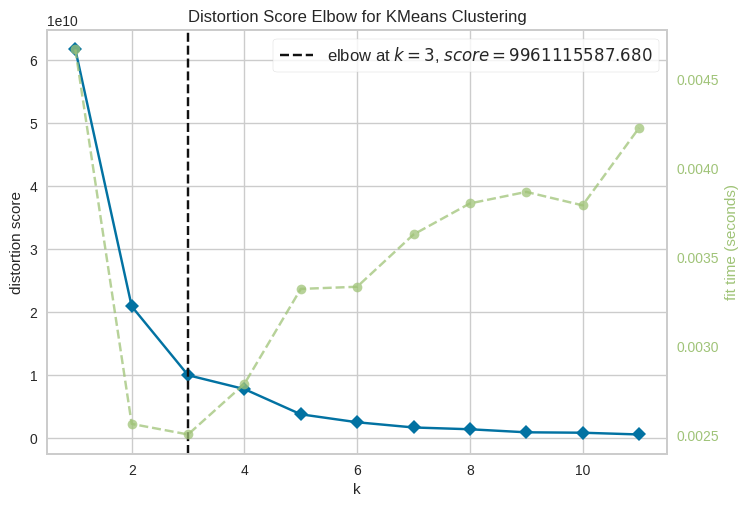

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)

In [15]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
#We assign the labels to each row in dataframe.
df["Clus_km"] = kmeans.labels_
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clus_km
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [17]:
kmeans.cluster_centers_

array([[3.80200000e+00, 8.89200000e+04],
       [6.34425197e+00, 8.38553543e+03],
       [8.95685714e+00, 3.86742857e+04]])

In [18]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.696607038870568


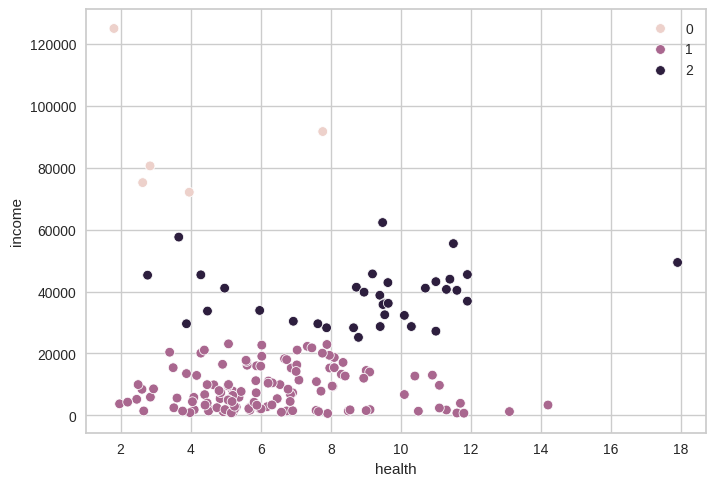

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="health", y="income", hue=kmeans.labels_)
plt.show()

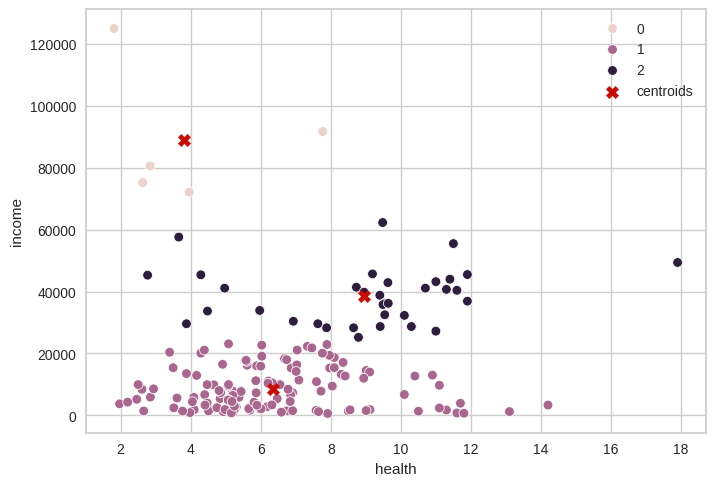

In [20]:
sns.scatterplot(data=xx, x="health", y="income", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [21]:
newdata=[[85.89,30400],[10,10000],[15,1700],[3,6000]]
d=pd.DataFrame(newdata,columns=['health','income'])
#d=[[15,1700]]
predictedClusters=kmeans.predict(d)
print(len(predictedClusters))
print(d)
print(predictedClusters)

4
   health  income
0   85.89   30400
1   10.00   10000
2   15.00    1700
3    3.00    6000
[2 1 1 1]


In [22]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
df = pd.read_csv('/content/diabetesN.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
df.info()
X= df['Glucose']
Y=df['BMI']
import numpy as np
data=np.array(list(zip(X,Y)))
data
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


In [26]:
# same thing using index location
xx = df.iloc[:,[3,5]]
xx

,SkinThickness,BMI
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


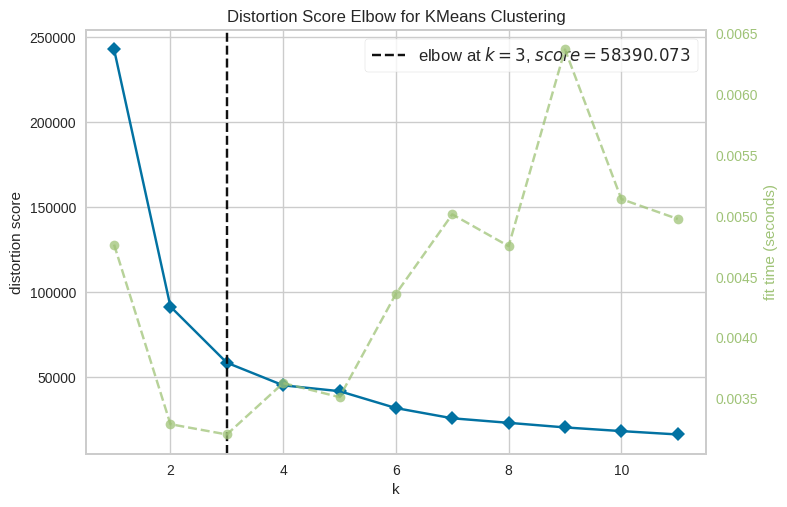

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)

In [29]:
kmeans.labels_

array([1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1,
       2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2,

In [30]:
df["Clus_km"] = kmeans.labels_
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Clus_km
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
5,5,116,74,0,0,25.6,0.201,30,0,2
6,3,78,50,32,88,31.0,0.248,26,1,1
7,10,115,0,0,0,35.3,0.134,29,0,2
8,2,197,70,45,543,30.5,0.158,53,1,1
9,8,125,96,0,0,0.0,0.232,54,1,2


In [31]:
kmeans.cluster_centers_

array([[22.33214286, 28.44392857],
       [37.7751004 , 37.94819277],
       [ 0.47280335, 29.94518828]])

In [32]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(1): 249, np.int32(0): 280, np.int32(2): 239})

In [33]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.47187846702602904


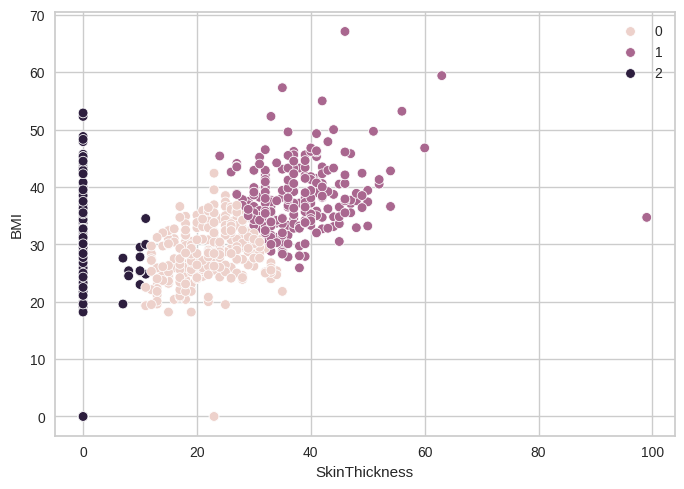

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="SkinThickness", y="BMI", hue=kmeans.labels_)
plt.show()

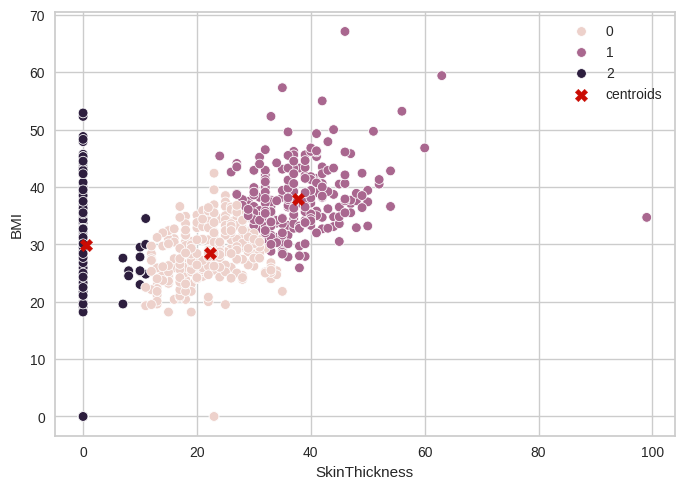

In [39]:
sns.scatterplot(data=xx, x="SkinThickness", y="BMI", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [41]:
newdata=[[85.89,30400],[10,10000],[15,1700],[3,6000]]
d=pd.DataFrame(newdata,columns=['SkinThickness','BMI'])
#d=[[15,1700]]
predictedClusters=kmeans.predict(d)
print(len(predictedClusters))
print(d)
print(predictedClusters)

4
   SkinThickness    BMI
0          85.89  30400
1          10.00  10000
2          15.00   1700
3           3.00   6000
[1 1 1 1]
